In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df=pd.read_pickle('dummydata.pkl')

In [5]:
df

,ids,x,y
0,g0,0.825230,0.936433
1,g1,0.789011,0.012824
2,g2,0.196846,0.581820
3,g3,0.660425,0.015975
4,g4,0.956591,0.815801
...,...,...,...
495,g495,0.628171,0.556210
496,g496,0.127760,0.971595
497,g497,0.939833,0.983450
498,g498,0.959873,0.575415


In [6]:
sigma=0.1

In [7]:
def Kernel(x,y,sigma):
    return np.exp(-(np.abs(x-y)**2)/(2*sigma**2))

In [8]:
Kernel(2,7,2)

0.04393693362340742

In [9]:
def xdot(x,Xs,K,sigma):
    numerator=0
    denominator=0
    for xi in Xs:
        numerator+=K(x,xi,sigma)*xi
        denominator+=K(x,xi,sigma)
    return (numerator/denominator)-x

In [10]:
xdot(0.7,df.x,Kernel,sigma)

-0.002138555432382172

In [11]:
Xs=np.arange(0,10,1)

In [12]:
np.delete(Xs,2)

array([0, 1, 3, 4, 5, 6, 7, 8, 9])

In [13]:
def Xdot(Xs,K,sigma):
    deltas=np.zeros(Xs.shape[0])
    for i in range(Xs.shape[0]):
        deltas[i]=xdot(Xs[i],np.delete(Xs,i),K,sigma)
    return deltas

In [14]:
newx=df.x+Xdot(df.x,Kernel,sigma)

In [15]:
newy=df.y+Xdot(df.y,Kernel,sigma)

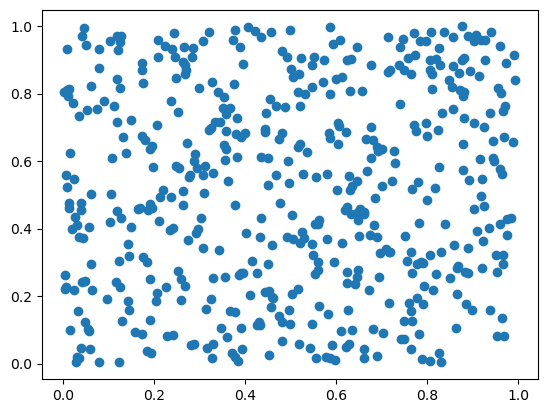

In [16]:
plt.scatter(df.x,df.y)

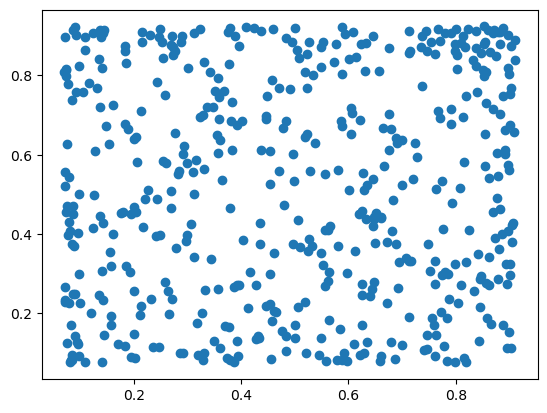

In [17]:
plt.scatter(newx,newy)

In [18]:
y0s=df[['x','y']].values.T

In [19]:
def meanshiftevolution(Ys,K,sigma):
    if Ys.ndim==1:
        Ys=np.array([Ys])
    deltas=np.zeros(Ys.shape) #create array for deltas for all the points and dimensions
    for i in range(Ys.shape[0]): #run through each dimension
        deltas[i]=Xdot(Ys[i],K,sigma)
    return Ys+deltas

In [20]:
#Xdot(df.x,Kernel,sigma)

In [21]:
#meanshifterror(0,y0s[0,:])

In [25]:
newYs=meanshiftevolution(y0s,Kernel,sigma)

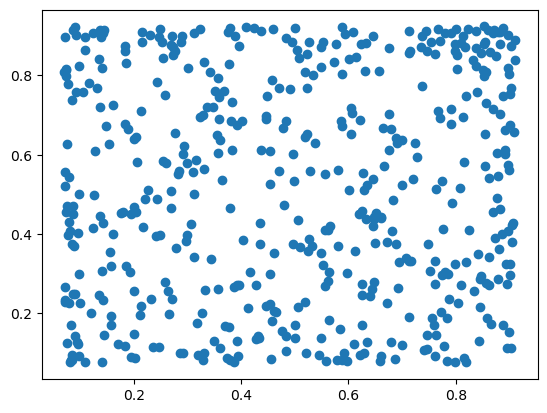

In [27]:
plt.scatter(newYs[0],newYs[1])

In [43]:
def makedense(y0s,K,sigma,numt):
    t=0
    newYs=y0s
    while t<numt:
        newYs=meanshiftevolution(newYs,Kernel,sigma)
        t+=1
    return newYs

In [45]:
new=makedense(y0s,Kernel,sigma,1)

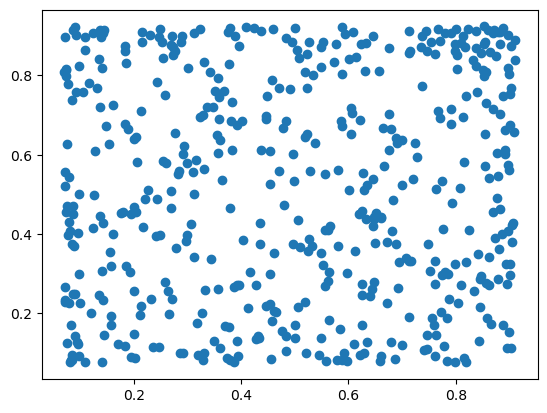

In [47]:
plt.scatter(new[0],new[1])

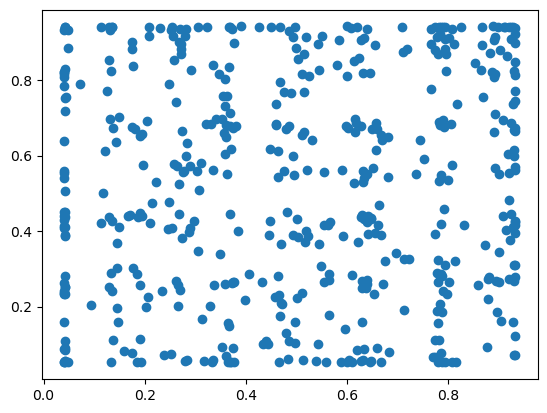

In [65]:
new=makedense(y0s,Kernel,0.03,3)
plt.scatter(new[0],new[1])